In [84]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [85]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [86]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [87]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)


In [88]:
# Create a DataFrame with the scaled data
normalized_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)

# Copy the crypto names from the original data
crypto_names = market_data_df.index

# Set the coinid column as index
normalized_df.index = crypto_names

# Display sample data
normalized_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [89]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia_list = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)

# 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(normalized_df)

# 3. Append the model.inertia_ to the inertia list
    inertia_list.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_list}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)


     k     inertia
0    1  287.000000
1    2  198.571818
2    3  145.635748
3    4   79.022435
4    5   66.217780
5    6   59.139070
6    7   48.406314
7    8   38.993588
8    9   34.400595
9   10   28.573603
10  11   23.890044


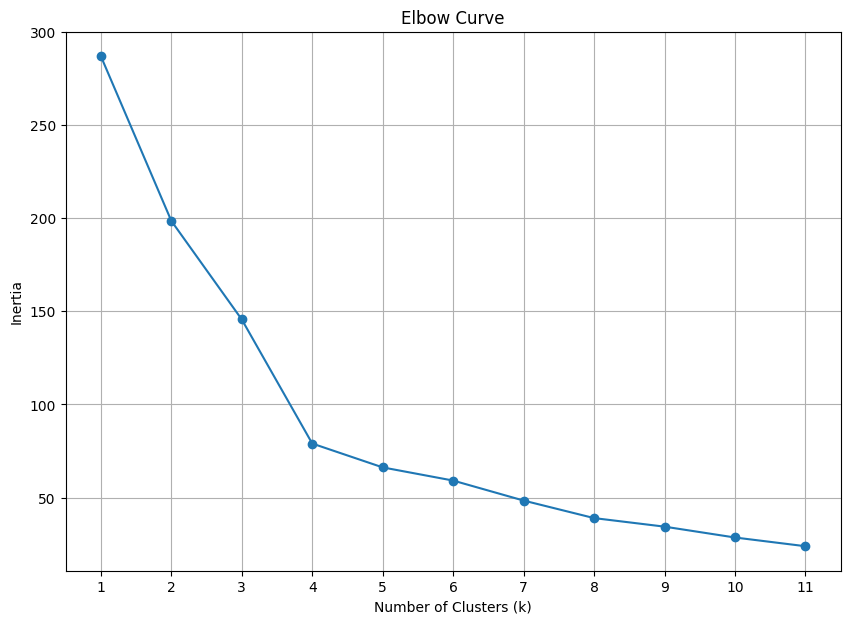

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_data = {
    'k': range(1, 12),
    'inertia': [
        287.000000, 198.571818, 145.635748, 79.022435, 66.217780, 
        59.139070, 48.406314, 38.993588, 34.400595, 28.573603, 23.890044
    ]
}
elbow_df = pd.DataFrame(elbow_data)

plt.figure(figsize=(10, 7))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [91]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)


In [92]:
# Fit the K-Means model using the scaled data
kmeans.fit(normalized_df)

KMeans(n_clusters=4, random_state=0)

In [93]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(normalized_df)

# View the resulting array of cluster values.
print(clusters)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [94]:
# Create a copy of the DataFrame
market_data_copy_df = market_data_df.copy()

In [95]:
# Add a new column to the DataFrame with the predicted clusters
market_data_copy_df['Cluster'] = clusters

# Display sample data
print(market_data_copy_df.head(10))


                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                              1.08388                     7.60278   
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

<Figure size 1000x700 with 0 Axes>

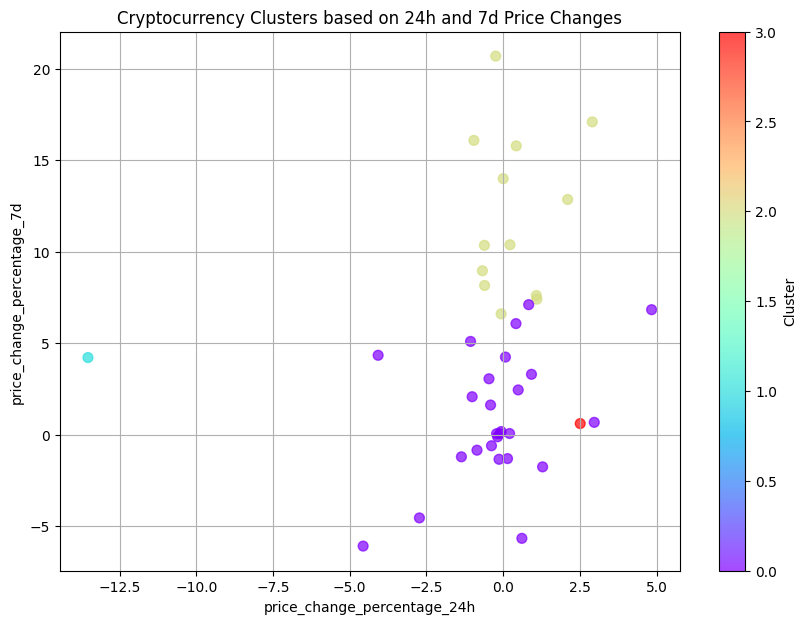

In [96]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.

plt.figure(figsize=(10, 7))
ax = market_data_copy_df.plot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c='Cluster', 
    colormap='rainbow',
    s=50,  # Set marker size for better visibility
    alpha=0.7,  # Set transparency for better visualization
    figsize=(10, 7),  # Set figure size
    title="Cryptocurrency Clusters based on 24h and 7d Price Changes",
    grid=True
)


# Use "rainbow" for the color to better visualize the data.
plt.grid(True)

# Show plot
plt.show()



### Optimize Clusters with Principal Component Analysis.

In [97]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [98]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(normalized_df)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'], index=market_data_df.index)


# View the first five rows of the DataFrame. 
print(pca_df.head(5))


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [99]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
# Retrieve the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Calculate the total explained variance
total_explained_variance = explained_variance.sum()

# Display the explained variance for each principal component
explained_variance_df = pd.DataFrame(
    explained_variance, 
    index=['PC1', 'PC2', 'PC3'], 
    columns=['Explained Variance']
)

print(explained_variance_df)
print(f"\nTotal explained variance by the three principal components: {total_explained_variance:.4f}")



     Explained Variance
PC1            0.371986
PC2            0.347008
PC3            0.176038

Total explained variance by the three principal components: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950

In [100]:
# Given explained variance ratios
explained_variance = [0.371986, 0.347008, 0.176038]

# Calculate the total explained variance
total_explained_variance = sum(explained_variance)

# Display the total explained variance
print(f"Total explained variance by the three principal components: {total_explained_variance:.4f}")


Total explained variance by the three principal components: 0.8950


In [101]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you


# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_df.index

# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
print(pca_df.head(10))


                      PC1       PC2       PC3
coin_id                                      
bitcoin         -0.600667  0.842760  0.461595
ethereum        -0.458261  0.458466  0.952877
tether          -0.433070 -0.168126 -0.641752
ripple          -0.471835 -0.222660 -0.479053
bitcoin-cash    -1.157800  2.041209  1.859715
binancecoin     -0.516534  1.388377  0.804071
chainlink       -0.450711  0.517699  2.846143
cardano         -0.345600  0.729439  1.478013
litecoin        -0.649468  0.432165  0.600303
bitcoin-cash-sv -0.759014 -0.201200 -0.217653


### Find the Best Value for k Using the PCA Data

In [102]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia_list = []


# Create a for loop to compute the inertia with each possible value of k
for k in k_values:

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)

# 2. Fit the model to the data using PCA DataFrame.
    kmeans.fit(pca_df)

# 3. Append the model.inertia_ to the inertia list
    inertia_list.append(kmeans.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_list}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
print(elbow_df)


     k     inertia
0    1  256.874086
1    2  168.811896
2    3  115.918077
3    4   49.665497
4    5   41.357314
5    6   30.796642
6    7   25.915457
7    8   21.890936
8    9   17.720699
9   10   13.838699
10  11    7.984355


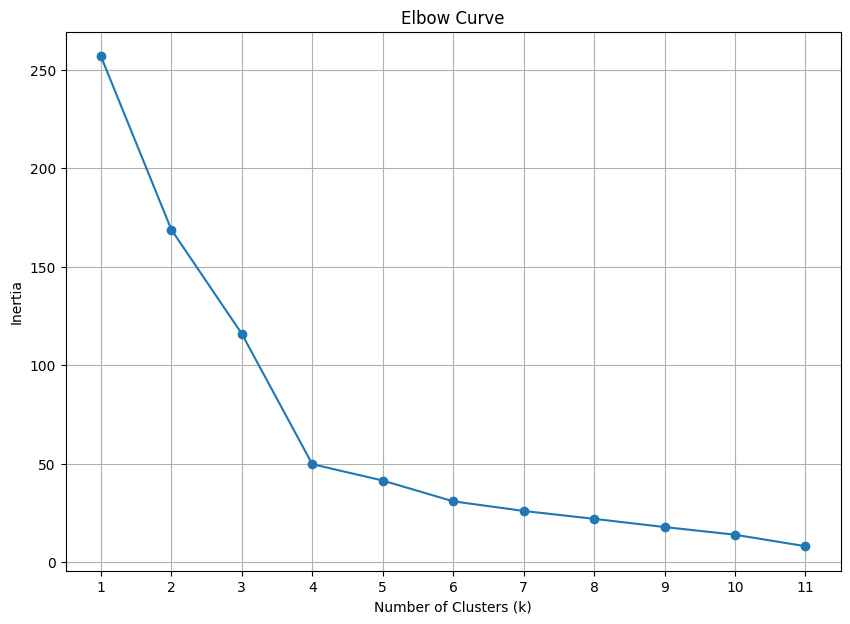

In [103]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

elbow_data = {
    'k': range(1, 12),
    'inertia': [
        256.874086, 168.811896, 115.918077, 49.665497, 41.357314, 
        30.796642, 25.915457, 21.890936, 17.720699, 13.838699, 7.984355
    ]
}
elbow_df = pd.DataFrame(elbow_data)

# Plot the Elbow curve
plt.figure(figsize=(10, 7))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 4

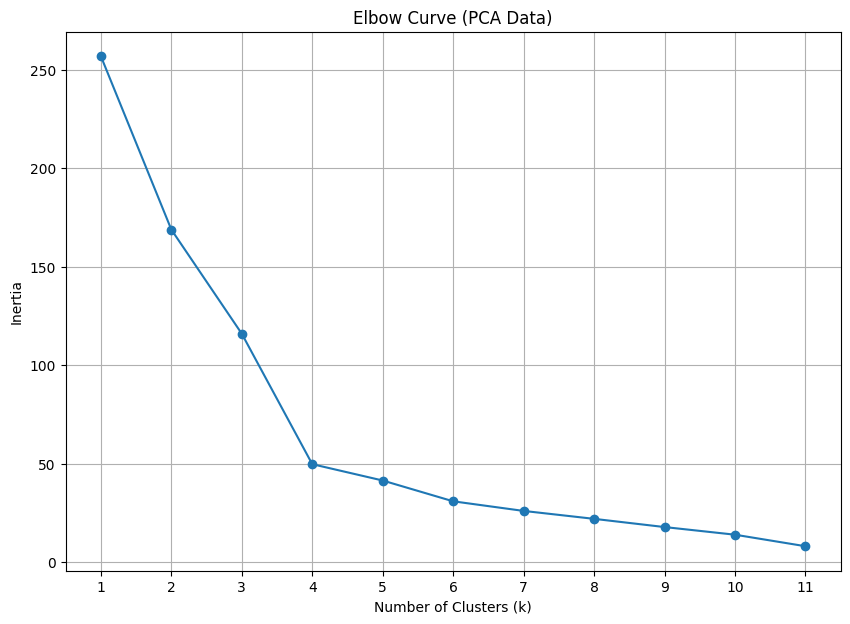

In [104]:

# Plot the Elbow curve for the PCA data
plt.figure(figsize=(10, 7))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()


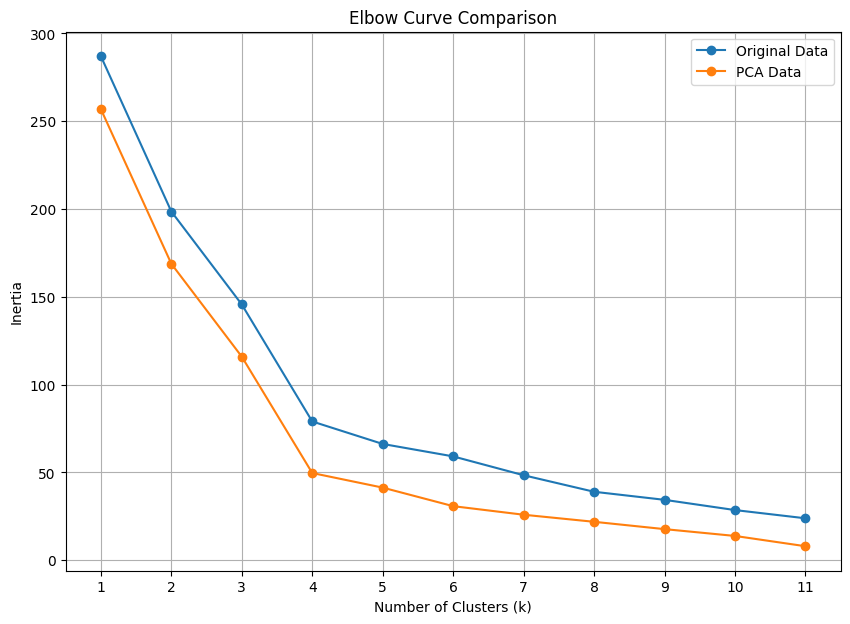

In [105]:
# Assuming original_inertia_list is the inertia list for the original data
original_inertia_list = [287.000000, 198.571818, 145.635748, 79.022435, 66.217780, 59.139070, 48.406314, 38.993588, 34.400595, 28.573603, 23.890044]

# Create DataFrame for original data
original_elbow_data = {'k': range(1, 12), 'inertia': original_inertia_list}
original_elbow_df = pd.DataFrame(original_elbow_data)

# Plot the Elbow curve for the original data
plt.figure(figsize=(10, 7))
plt.plot(original_elbow_df['k'], original_elbow_df['inertia'], marker='o', label='Original Data')
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', label='PCA Data')
plt.title('Elbow Curve Comparison')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 12))
plt.grid(True)
plt.legend()
plt.show()


### Cluster Cryptocurrencies with K-means Using the PCA Data

In [106]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=0)


In [107]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)


KMeans(n_clusters=4, random_state=0)

In [108]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = kmeans.predict(pca_df)
pca_df['Cluster'] = pca_clusters


# Print the resulting array of cluster values.
print(pca_df.head(10))


                      PC1       PC2       PC3  Cluster
coin_id                                               
bitcoin         -0.600667  0.842760  0.461595        2
ethereum        -0.458261  0.458466  0.952877        2
tether          -0.433070 -0.168126 -0.641752        0
ripple          -0.471835 -0.222660 -0.479053        0
bitcoin-cash    -1.157800  2.041209  1.859715        2
binancecoin     -0.516534  1.388377  0.804071        2
chainlink       -0.450711  0.517699  2.846143        2
cardano         -0.345600  0.729439  1.478013        2
litecoin        -0.649468  0.432165  0.600303        2
bitcoin-cash-sv -0.759014 -0.201200 -0.217653        0


In [109]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['Cluster'] = pca_clusters

# Display sample data
print(pca_df_copy.head(10))


                      PC1       PC2       PC3  Cluster
coin_id                                               
bitcoin         -0.600667  0.842760  0.461595        2
ethereum        -0.458261  0.458466  0.952877        2
tether          -0.433070 -0.168126 -0.641752        0
ripple          -0.471835 -0.222660 -0.479053        0
bitcoin-cash    -1.157800  2.041209  1.859715        2
binancecoin     -0.516534  1.388377  0.804071        2
chainlink       -0.450711  0.517699  2.846143        2
cardano         -0.345600  0.729439  1.478013        2
litecoin        -0.649468  0.432165  0.600303        2
bitcoin-cash-sv -0.759014 -0.201200 -0.217653        0


In [110]:
pip install hvplot


3849.32s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [113]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
# Create a scatter plot using hvPlot
import hvplot.pandas

scatter_plot = pca_df_copy.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='Cluster', 
    cmap='rainbow', 
    size=50, 
    alpha=0.7, 
    title="Cryptocurrency Clusters based on PCA Components"
)

# Display the scatter plot
scatter_plot

:Scatter   [PC1]   (PC2,Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [117]:
# Use the columns from the original scaled DataFrame as the index.
pca_df_copy = pca_df.copy()
pca_df_copy['Cluster'] = pca_clusters
for column in market_data_df.columns:
    pca_df_copy[column] = market_data_df[column]
    scatter_plot = pca_df_copy.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='Cluster', 
    cmap='rainbow', 
    size=50, 
    alpha=0.7, 
    title="Cryptocurrency Clusters based on PCA Components"
)
    
scatter_plot


:Scatter   [PC1]   (PC2,Cluster)

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
Principal Component 1 (PC1):
- **Strongest Positive Influence:** `price_change_percentage_200d`
- **Strongest Negative Influence:** `price_change_percentage_24h`

### Principal Component 2 (PC2):
- **Strongest Positive Influence:** `price_change_percentage_30d`
- **Strongest Negative Influence:** `price_change_percentage_1y`

### Principal Component 3 (PC3):
- **Strongest Positive Influence:** `price_change_percentage_7d`
- **Strongest Negative Influence:** `price_change_percentage_60d`
    

In [118]:
# Retrieve the loadings (components) from the PCA model
loadings = pca.components_

# Create a DataFrame for the loadings
loading_df = pd.DataFrame(loadings, columns=market_data_df.columns, index=['PC1', 'PC2', 'PC3'])

# Display the loadings
print(loading_df)

# Determine the features with the strongest positive and negative influence on each component
strongest_influences = pd.DataFrame({
    'Strongest Positive Influence': loading_df.idxmax(axis=1),
    'Max Loading Value': loading_df.max(axis=1),
    'Strongest Negative Influence': loading_df.idxmin(axis=1),
    'Min Loading Value': loading_df.min(axis=1)
})

print("\nStrongest influences on each principal component:")
print(strongest_influences)

     price_change_percentage_24h  price_change_percentage_7d  \
PC1                    -0.416728                   -0.102432   
PC2                     0.358162                    0.227432   
PC3                    -0.218795                    0.787670   

     price_change_percentage_14d  price_change_percentage_30d  \
PC1                    -0.009162                     0.191523   
PC2                     0.540415                     0.562182   
PC3                     0.349534                    -0.181744   

     price_change_percentage_60d  price_change_percentage_200d  \
PC1                     0.320365                      0.594468   
PC2                     0.434040                      0.027735   
PC3                    -0.361377                      0.039733   

     price_change_percentage_1y  
PC1                    0.568379  
PC2                   -0.150789  
PC3                    0.210541  

Strongest influences on each principal component:
     Strongest Positive Influe